In [297]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [298]:
# Context
# Проверяемые гипотезы:
# 1. Зависимость выживаемости и пола
# 2. Зависимость выживаемости и класса билета
# 3. Зависимость выживаемости и порта посадки

In [299]:
data = pd.read_csv("train.csv")
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,1,"Oconnor, Frankie",male,NaN,2,0,209245,27.14,C12239,S
1,1,0,3,"Bryan, Drew",male,NaN,0,0,27323,13.35,NaN,S
2,2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,NaN,S
3,3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,NaN,S
4,4,1,3,"Bond, Michael",male,25.00,0,0,427635,7.76,NaN,S
5,5,0,2,"Sassano, Jonathan",male,35.00,0,0,13363,6.71,NaN,S
6,6,0,3,"Conway, Jose",male,7.00,0,0,A/5,9.77,NaN,S
7,7,1,3,"Werner, Linda",female,6.00,1,2,434426,31.50,NaN,S
8,8,0,1,"Wardlaw, Michael",male,27.00,2,1,474849,73.02,A7253,S
9,9,0,2,"Greigo, Rudy",male,66.00,0,0,6981,9.14,D2969,C


In [300]:
# Определение числа мужчин
number_men = data[data['Sex'] == 'male'].shape[0]
number_men

56114

In [301]:
# Определение процента мужчин от всех пассажиров
percent_men = round(number_men/len(data)*100, 2)
percent_men

56.11

In [302]:
# Определение числа женщин
number_women = data[data['Sex'] == 'female'].shape[0]
number_women

43886

In [147]:
# Определение процента женщин от всех пассажиров
percent_women = round(number_women/len(data)*100, 2)
percent_women

43.89

<AxesSubplot:>

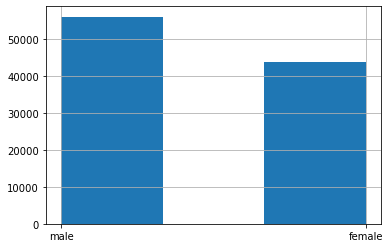

In [182]:
# Гистограмма количества мужчин и женщин
data['Sex'].hist(bins = 3)

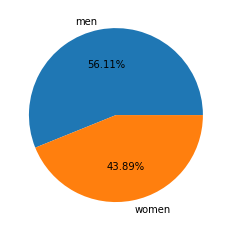

In [184]:
# Круговая диаграмма соотношения мужчин и женщин в %
plt.pie(x=[percent_men, percent_women], labels=['men', 'women'], autopct='%1.f%%')
plt.show()

In [194]:
# Определение числа выживших пассажиров
number_survivor = data[data['Survived'] == 1].shape[0]
number_survivor

42774

In [23]:
# Определение числа выживших мужчин
number_survivor_men = data[(data['Survived'] == 1) & (data['Sex'] == 'male')].shape[0]
number_survivor_men

11548

In [191]:
# Определение числа выживших женщин
number_survivor_women = data[(data['Survived'] == 1) & (data['Sex'] == 'female')].shape[0]
number_survivor_women

31226

<AxesSubplot:>

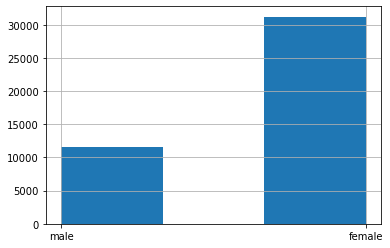

In [190]:
# Гистограмма количества выживших мужчин и женщин
data[data['Survived'] == 1]['Sex'].hist(bins = 3)

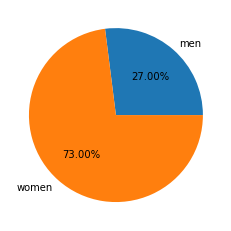

In [197]:
# Круговая диаграмма соотношения выживших мужчин и женщин
plt.pie(x=[number_survivor_men, number_survivor_women], labels=['men', 'women'], autopct='%1.2f%%')
plt.show()

In [37]:
# Общий процент выживших пассажиров
percent_survivor = round((number_survivor/len(data)*100), 2)
percent_survivor

42.77

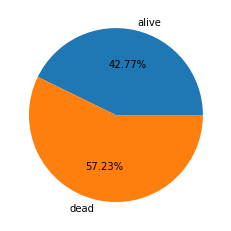

In [193]:
# Круговая диаграмма соотношения выживших и погибших
plt.pie(x=[percent_survivor, 100-percent_survivor], labels=['alive', 'dead'], autopct='%1.2f%%')
plt.show()

In [38]:
# Процент выживших среди мужчин
percent_survivor_men = round(number_survivor_men/number_men*100, 2)
percent_survivor_men

20.58

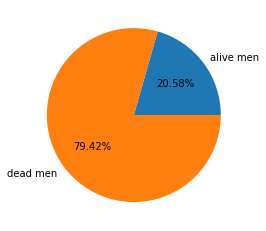

In [195]:
# Круговая диаграмма соотношения выживших мужчин к погибшим
plt.pie(x=[percent_survivor_men, 100-percent_survivor_men], labels=['alive men', 'dead men'], autopct='%1.2f%%')
plt.show()

In [39]:
# Процент выживших среди женщин
percent_survivor_women = round(number_survivor_women/number_women*100, 2)
percent_survivor_women

71.15

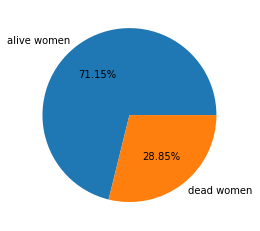

In [196]:
# Круговая диаграмма соотношения выживших женщин к погибшим
plt.pie(x=[percent_survivor_women, 100-percent_survivor_women], labels=['alive women', 'dead women'], autopct='%1.2f%%')
plt.show()

In [274]:
# Выберем всех у кого указан возраст
age = data[(data['Age'] >= 0) | (data['Age'] <= 100)]


<AxesSubplot:>

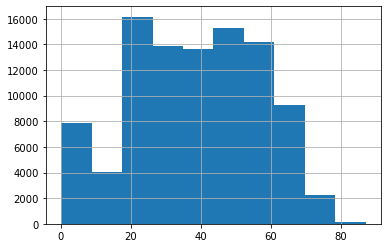

In [267]:
# Гистограмма распределения по возрасту
age['Age'].hist()

In [77]:
# Определение среднего возраста пассажиров
mean_age = round(age['Age'].mean(), 2)
mean_age

38.36

In [84]:
# Определение среднего возраста среди мужчин
mean_age_men = round(age[age['Sex'] == 'male']['Age'].mean(), 2)
mean_age_men

37.03

In [85]:
# Определение среднего возраста среди женщин
mean_age_women = round(age[age['Sex'] == 'female']['Age'].mean(), 2)
mean_age_women

40.04

In [89]:
# Определение среднего возраста среди выживших пассажиров
mean_age_suvivor = round(age[age['Survived'] == 1]['Age'].mean(), 2)
mean_age_suvivor

40.55

In [88]:
# Определение среднего возраста среди погибших пассажиров
mean_age_died = round(age[age['Survived'] == 0]['Age'].mean(), 2)
mean_age_died

36.71

In [155]:
# Максимальный возраст пассажира
max_age = max(age['Age'])
max_age

87.0

In [268]:
# Минимальный возраст пассажира
min_age = min(age['Age'])
min_age

0.08

In [270]:
# Вычисление количества детей на борту(меньше 18 лет)
children = age[age['Age'] < 18 ].shape[0]
children

11917

In [271]:
# Вычисление количество выживших детей (меньше 18 лет)
children = age[(age['Age'] < 18) & (age['Survived'] == 1)].shape[0]
children

5212

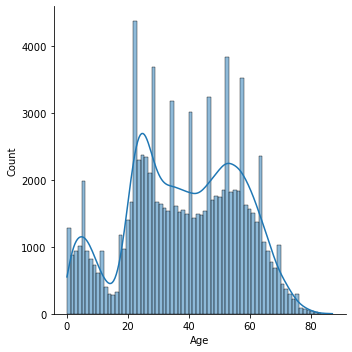

In [284]:
# Гистограмма распределения возрастов
sns.displot(
        data=data,
        x='Age', kde = True)

In [91]:
# Определение числа билетов 1 класса
p_class_one = data[data['Pclass'] == 1].shape[0]
p_class_one

30315

In [92]:
# Определение числа билетов 2 класса
p_class_two = data[data['Pclass'] == 2].shape[0]
p_class_two

28679

In [93]:
# Определение числа билетов 3 класса
p_class_three = data[data['Pclass'] == 3].shape[0]
p_class_three

41006

<AxesSubplot:>

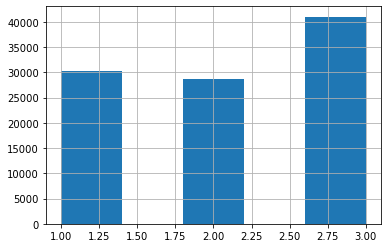

In [211]:
# Гистограмма числа пассажиров 1, 2 и 3 классов
data['Pclass'].hist(bins = 5)

In [94]:
# Определение процента билетов 1 класса от общего числа
percent_one_class = round(p_class_one/len(data)*100, 2)
percent_one_class

30.31

In [95]:
# Определение процента билетов 2 класса от общего числа
percent_two_class = round(p_class_two/len(data)*100, 2)
percent_two_class

28.68

In [96]:
# Определение процента билетов 3 класса от общего числа
percent_three_class = round(p_class_three/len(data)*100, 2)
percent_three_class

41.01

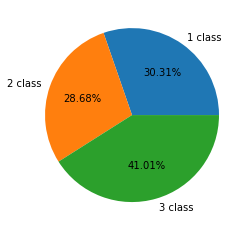

In [212]:
# Круговая диаграмма соотношения билетов 1, 2 и 3 классов
plt.pie(x=[percent_one_class, percent_two_class, percent_three_class], 
        labels=['1 class', '2 class', '3 class'], autopct='%1.2f%%')
plt.show()

In [106]:
# Определение числа выживших пассажиров 1 класса
alive_one_class =  data[(data['Survived'] == 1) & (data['Pclass'] == 1)].shape[0]
alive_one_class

17576

In [107]:
# Определение числа выживших пассажиров 2 класса
alive_two_class =  data[(data['Survived'] == 1) & (data['Pclass'] == 2)].shape[0]
alive_two_class

15057

In [108]:
# Определение числа выживших пассажиров 3 класса
alive_three_class =  data[(data['Survived'] == 1) & (data['Pclass'] == 3)].shape[0]
alive_three_class

10141

<AxesSubplot:>

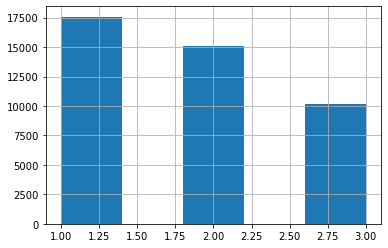

In [214]:
# Гистограмма числа выживших пассажиров 1, 2 и 3 классов
data[data['Survived'] == 1]['Pclass'].hist(bins = 5)

In [111]:
# Процент выживших пассажиров 1 класса от общего числа выживших
percent_alive_one_class = round(alive_one_class/number_survivor*100, 2)
percent_alive_one_class

41.09

In [112]:
# Процент выживших пассажиров 2 класса от общего числа выживших
percent_alive_two_class = round(alive_two_class/number_survivor*100, 2)
percent_alive_two_class

35.2

In [113]:
# Процент выживших пассажиров 3 класса от общего числа выживших
percent_alive_three_class = round(alive_three_class/number_survivor*100, 2)
percent_alive_three_class

23.71

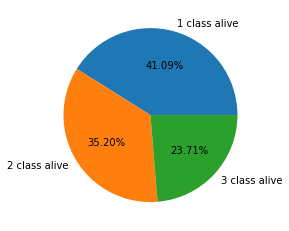

In [215]:
# Гистограмма соотношения выживших пассажиров 1, 2 и 3 класса
plt.pie(x=[percent_alive_one_class, percent_alive_two_class, percent_alive_three_class], 
        labels=['1 class alive', '2 class alive', '3 class alive'], autopct='%1.2f%%')
plt.show()

In [114]:
# Определение выживаемости для пассажиров 1 класса
percent_survivor_one_class = round(alive_one_class/p_class_one*100, 2)
percent_survivor_one_class

57.98

In [115]:
# Определение выживаемости для пассажиров 2 класса
percent_survivor_two_class = round(alive_two_class/p_class_two*100, 2)
percent_survivor_two_class

52.5

In [116]:
# Определение выживаемости для пассажиров 3 класса
percent_survivor_three_class = round(alive_three_class/p_class_three*100, 2)
percent_survivor_three_class

24.73

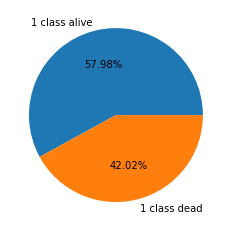

In [228]:
# Гистограмма процента выживаемости для пассажиров 1 класса
plt.pie(x=[percent_survivor_one_class, 100-percent_survivor_one_class], 
        labels=['1 class alive', '1 class dead'], autopct='%1.2f%%')
plt.show()

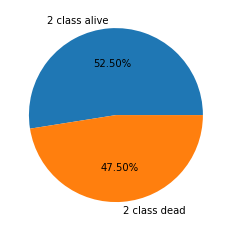

In [229]:
# Гистограмма процента выживаемости для пассажиров 2 класса
plt.pie(x=[percent_survivor_two_class, 100-percent_survivor_two_class], 
        labels=['2 class alive', '2 class dead'], autopct='%1.2f%%')
plt.show()

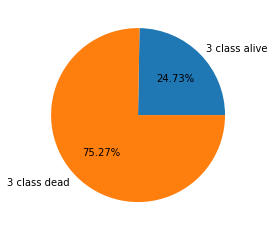

In [230]:
# Гистограмма процента выживаемости для пассажиров 3 класса
plt.pie(x=[percent_survivor_three_class, 100-percent_survivor_three_class], 
        labels=['3 class alive', '3 class dead'], autopct='%1.2f%%')
plt.show()

In [234]:
# Определяем количество тех у кого на борту были братья(сестры) или супруги
sibsp = data[data['SibSp'] > 0].shape[0]
sibsp

26692

<AxesSubplot:>

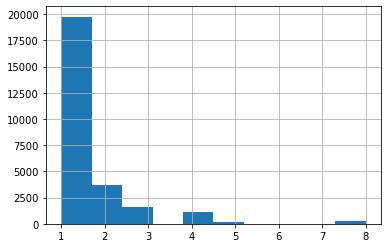

In [236]:
# Гистограмма распределения количества пассажиров с количеством братьев(сестер) или супругов на борту
data[data['SibSp'] > 0]['SibSp'].hist()

In [237]:
# Определяем количество тех у кого на борту были родители или дети
parch = data[data['Parch'] > 0].shape[0]
parch

26460

<AxesSubplot:>

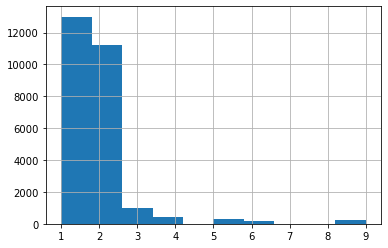

In [238]:
# Гистограмма распределения количества пассажиров с количеством родителей или детей на борту
data[data['Parch'] > 0]['Parch'].hist()

In [275]:
# Определяем пассажиров с указанным пунктом отправления
embarked = data[(data['Embarked'] == 'C') | (data['Embarked'] == 'S') | (data['Embarked'] == 'Q')]

In [131]:
# Определяем число пассажиров с пунктом отправления Шербург
Cherbourg = data[data['Embarked'] == 'C'].shape[0]
Cherbourg

22187

In [132]:
# Определяем число пассажиров с пунктом отправления Квиинстоун
Queenstown = data[data['Embarked'] == 'Q'].shape[0]
Queenstown

5424

In [133]:
# Определяем число пассажиров с пунктом отправления Саутгемптон
Southampton = data[data['Embarked'] == 'S'].shape[0]
Southampton

72139

In [134]:
# Определяем процент пассажиров с пунктом отправления Шербург от общего числа пассажиров
percent_Cherbourg = round(Cherbourg/len(data)*100, 2)
percent_Cherbourg

22.19

In [135]:
# Определяем процент пассажиров с пунктом отправления Квинстоун от общего числа пассажиров
percent_Queenstown = round(Queenstown/len(data)*100, 2)
percent_Queenstown

5.42

In [136]:
# Определяем процент пассажиров с пунктом отправления Саутгемптон от общего числа пассажиров
percent_Southampton = round(Southampton/len(data)*100, 2)
percent_Southampton

72.14

In [138]:
# Определяем процент пассажиров с неуказанным пунктом отправления
percent_unknown = 100 - percent_Cherbourg - percent_Queenstown - percent_Southampton
percent_unknown

0.25

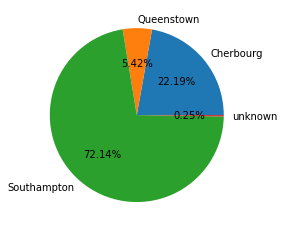

In [240]:
# Круговая диаграмма распределения пассажиров по пункту отправления
plt.pie(x=[percent_Cherbourg, percent_Queenstown, percent_Southampton, percent_unknow], 
        labels=['Cherbourg', 'Queenstown', 'Southampton', 'unknown'], autopct='%1.2f%%')
plt.show()

In [140]:
# Определяем число выживших пассажиров с пунктом отправления Шербург
Cherbourg_alive = data[(data['Survived'] == 1) & (data['Embarked'] == 'C')].shape[0]
Cherbourg_alive

16669

In [141]:
# Определяем число выживших пассажиров с пунктом отправления Квинстон
Queenstown_alive = data[(data['Survived'] == 1) & (data['Embarked'] == 'Q')].shape[0]
Queenstown_alive

3238

In [142]:
# Определяем число выживших пассажиров с пунктом отправления Саутгемптон
Southampton_alive = data[(data['Survived'] == 1) & (data['Embarked'] == 'S')].shape[0]
Southampton_alive

22745

In [143]:
# Определяем число выживших пассажиров с неуказанным пунктом отправления
other_alive = number_survivor-Cherbourg_alive-Queenstown_alive-Southampton_alive
other_alive

122

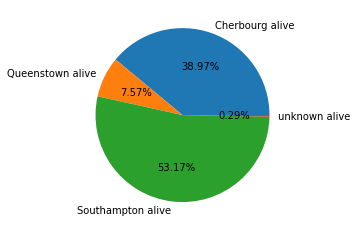

In [241]:
# Круговая диаграмма распределения выживших пассажиров по пункту отправления
plt.pie(x=[Cherbourg_alive, Queenstown_alive, Southampton_alive, other_alive], 
        labels=['Cherbourg alive', 'Queenstown alive', 'Southampton alive', 'unknown alive'], autopct='%1.2f%%')
plt.show()

In [242]:
# Опрделение процента выживаемости пассажиров из Шербурга
percent_sirvivor_from_Cherbourg = round(Cherbourg_alive/Cherbourg*100, 2)
percent_sirvivor_from_Cherbourg

75.13

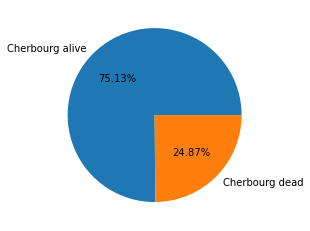

In [245]:
# Гистограмма процента выживаемости для пассажиров из Шербурга
plt.pie(x=[percent_sirvivor_from_Cherbourg, 100-percent_sirvivor_from_Cherbourg], 
        labels=['Cherbourg alive', 'Cherbourg dead'], autopct='%1.2f%%')
plt.show()

In [243]:
# Опрделение процента выживаемости пассажиров из Квинстона
percent_sirvivor_from_Queenstown = round(Queenstown_alive/Queenstown*100, 2)
percent_sirvivor_from_Queenstown

59.7

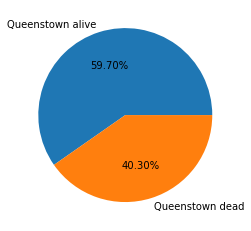

In [246]:
# Гистограмма процента выживаемости для пассажиров из Квинстона
plt.pie(x=[percent_sirvivor_from_Queenstown, 100-percent_sirvivor_from_Queenstown], 
        labels=['Queenstown alive', 'Queenstown dead'], autopct='%1.2f%%')
plt.show()

In [244]:
# Опрделение процента выживаемости пассажиров из Саутгемптона
percent_sirvivor_from_Southampton = round(Southampton_alive/Southampton*100, 2)
percent_sirvivor_from_Southampton

31.53

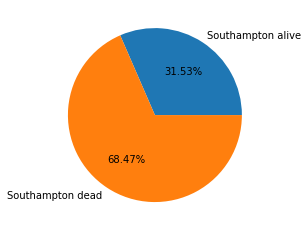

In [247]:
# Гистограмма процента выживаемости для пассажиров из Саутгемптона
plt.pie(x=[percent_sirvivor_from_Southampton, 100-percent_sirvivor_from_Southampton], 
        labels=['Southampton alive', 'Southampton dead'], autopct='%1.2f%%')
plt.show()

In [164]:
# Определение пассажиров с указанной стоимостью билетов
cost_ticket = data[data['Fare'] > 0]
cost_ticket

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,1,"Oconnor, Frankie",male,NaN,2,0,209245,27.14,C12239,S
1,1,0,3,"Bryan, Drew",male,NaN,0,0,27323,13.35,NaN,S
2,2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,NaN,S
3,3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,NaN,S
4,4,1,3,"Bond, Michael",male,25.00,0,0,427635,7.76,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99995,1,2,"Bell, Adele",female,62.00,0,0,PC 15008,14.86,D17243,C
99996,99996,0,2,"Brown, Herman",male,66.00,0,0,13273,11.15,NaN,S
99997,99997,0,3,"Childress, Charles",male,37.00,0,0,NaN,9.95,NaN,S
99998,99998,0,3,"Caughlin, Thomas",male,51.00,0,1,458654,30.92,NaN,S


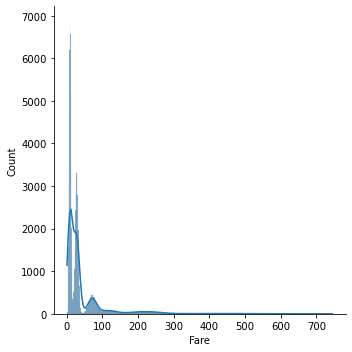

In [286]:
# Гистограмма распределения стоимости билетов
sns.displot(data=data, x='Fare', kde = True)

In [165]:
# Определение самого дорого билета
max_cost_ticket = max(cost_ticket['Fare'])
max_cost_ticket

744.66

In [166]:
# Определение самого дешевого билета
min_cost_ticket = min(cost_ticket['Fare'])
min_cost_ticket

0.68

In [167]:
# Определение средней стоимости билетов
mean_cost_ticket = round(cost_ticket['Fare'].mean(), 2)
mean_cost_ticket

43.93

<AxesSubplot:>

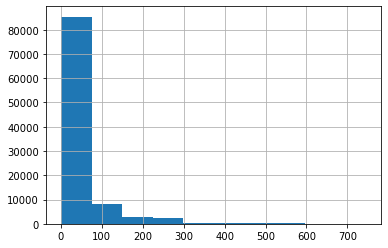

In [168]:
# Гистограмма распределения стоимости билетов
cost_ticket['Fare'].hist()

In [256]:
# Определим обладателей 20 самых дорогих билетов
most_cost_ticket = data.sort_values(by='Fare', ascending = False)
most_cost_ticket.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
40061,40061,1,1,"Harper, Dannie",male,58.0,0,1,7468,744.66,C10375,Q
36697,36697,1,1,"Kramer, Marjorie",female,35.0,0,0,PC 297290,744.46,C19780,C
74299,74299,1,1,"Ramirez, Lora",female,60.0,0,0,424053,742.13,C17346,C
59382,59382,1,1,"Todd, Dale",male,54.0,0,0,209467,735.70,C8653,C
70745,70745,1,1,"Jenson, Helen",female,33.0,0,0,PC 28064,735.48,C22524,C
85559,85559,0,1,"Poole, Chester",male,NaN,1,0,30457,732.01,B12132,C
53092,53092,1,1,"Linares, Rufus",male,55.0,1,0,SC 29707,727.65,C4593,S
49192,49192,1,1,"Nicholas, Joanna",female,65.0,0,2,25122,717.23,C10786,C
39515,39515,0,1,"Norman, Loretta",female,61.0,0,1,13754,715.44,C3971,C
14776,14776,1,1,"Mills, Sarah",female,34.0,1,0,30012,706.70,C18939,C


In [ ]:
# Summary
# 1. Пасажиров мужчин было больше на борту
# 2. Пассажиров женщин спаслось больше
# 3. Больше пассажиров погибло чем спаслось
# 4. Средний возраст пассажиров на борту - 38.36 лет
# 5. На борту находилось - 11917 детей (меньше 18 лет) из них спаслось - 5212
# 6. Пассажиров 3 класса на борту было больше всего
# 7. Среди выживших больше всего пассажиров 1 класса
# 8. 26692 человек имели братьев/сестер или супругов на борту
# 9. 26460 человек имели родителей или детей на борту
# 10. Подавляющее большинство пассажиров отправлялись из Саутгемптона
# 11. Процент выживаемости выше у пассажиров из Шербурга
# 12. Самый дорогой билет стоил - 744.66, а самый дешевый - 0.68
# 13. Средняя стоимость билета составила - 43.93
# 14. Среди 20 обладателей самых дорогих билетов 18 выжили

# Вывод по гипотезам: 
# Самая высокая вероятность выжить у женщин из 1 класса с пунктом отправления Шербург.
# Самая низкая вероятность выжить у мужчин из 3 класса с пунктом отправления Саутгемптон.